### Get LA Region Chinese Population Data

#### Load Libarary

In [2]:
import numpy as np 
import pandas as pd

import urllib
!pip install lxml   # Need to run at least once

     |████████████████████████████████| 5.8MB 29.0MB/s eta 0:00:01


##### Because that website contains multiple tables in various format, we utilized the Pandas and lxml to pin point the table (7th) we need to retrieve, and pulled the data into a dataframe for our analysis. That data set contains the top 40 cities with highest penetration of Chinese American, and also include all top cities with high volume of populations. 

In [3]:
df_cp = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._cities_with_significant_Chinese-American_populations',header=1)
df_cp_LA = df_cp[7]     # HTML has multipl tables, and Double headers so header = 1

df_cp_LA.head()

,Rank,City,County,Chinese-Americans,Percentage
0,1,Arcadia,Los Angeles,26229,45.6
1,2,Monterey Park,Los Angeles,27244,44.6
2,3,Temple City,Los Angeles,15741,43.6
3,4,San Marino,Los Angeles,5766,43.3
4,5,San Gabriel,Los Angeles,16893,42.0


In [4]:
df_cp_LA.shape

(42, 5)

#### Retrive Geo Location Data

##### Import needed libraries to retrive lantitudes and longitudes for each city

In [5]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install geocoder   # Run once if below not working
import geocoder


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.20.0-py_0       conda-forge

The following p

#####
##### Import the Geo data by Geolocator (Be reminded this process is not very reliable, need to run a couple times to accumulate data for all cities)
#####     To maximize the success rate, we added a timer to pause the run by 1 second after each city run, so alleviate server load and minimize failures

In [8]:
import time

df_cp_LA.insert(5, 'latitude', 0)   # insert once
df_cp_LA.insert(6, 'longitude', 0)  # insert once

df_cp_LA = df_cp_LA.astype({"latitude": np.float32, "longitude": np.float32})

print('The geograpical coordinate of Country are:')
for index in range(0, len(df_cp_LA)):
    address = df_cp_LA['City'][index] + ', ' + df_cp_LA['County'][index]
    location = geolocator.geocode(address,  timeout=10)  
    latitude = location.latitude
    longitude = location.longitude
    print('{}, {}, {}, {}.'.format(index, address, latitude, longitude))
    df_cp_LA['latitude'][index]=latitude
    df_cp_LA['longitude'][index]=longitude
    time.sleep(1)
    

df_cp_LA.head()

The geograpical coordinate of Country are:


NameError: name 'geolocator' is not defined

##### Be cautioned that the data precision accuracy will be reduced if we just do a to_csv. It is suggested to add a floate data format when saving the data to preserve the decimals.

In [38]:
df_cp_LA.to_csv('LA Area Chiniese Population.csv',float_format='%.6f')    # Note: precision to prevent loss of info

#####  Retrieve data saved in earlier run, so that we only retrive data once during all iterations of data testing. 

In [9]:
# Skip geolocator run, load data retrived before

df_cp_LA_LL=pd.read_csv('LA Area Chiniese Population.csv')

##### Check up the full set of City Population Data

In [10]:
df_cp_LA=df_cp_LA_LL[['Rank','City','County','Chinese-Americans','Percentage','latitude','longitude']]
df_cp_LA

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604
5,6,East San Gabriel,Los Angeles,6109,38.2,34.117268,-118.082649
6,7,Alhambra,Los Angeles,30683,36.2,34.093040,-118.127060
7,8,Rowland Heights,Los Angeles,18276,36.2,33.976124,-117.905342
8,9,Rosemead,Los Angeles,19480,35.7,34.067616,-118.087975
9,10,Walnut,Los Angeles,10296,34.4,34.020290,-117.865341


### .
### Retrive Geo Veue Data via Foursquare

#### Following set of information are required to retrive data from Foursquare
•	Credentials (Client ID and Client Secret Code)
•	Version of Foursuqare data (“20180605” used)
•	Geo coordinates to pull data (A typical city Acadia location is used)
•	Radius specifying the area size data to be pulled from (3000)
•	Limit, the number of trial to pull data (100)


In [11]:
CLIENT_ID = 'EBWLMF3LSPHULWFQILFWHLK1FD3CJOGNNRIJ4QS3J2PLCXZ3'      # your Foursquare ID
CLIENT_SECRET = 'TAZD2FQQTAVMLORU3ZDXSH1NA4H5ZSURHSOUBRBCUR4MO5XK'  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EBWLMF3LSPHULWFQILFWHLK1FD3CJOGNNRIJ4QS3J2PLCXZ3
CLIENT_SECRET:TAZD2FQQTAVMLORU3ZDXSH1NA4H5ZSURHSOUBRBCUR4MO5XK


### Get Top Venues in LA cities where Chinese density high

In [12]:
neighborhood_latitude = df_cp_LA.loc[0, 'latitude'] # top city latitude value
neighborhood_longitude = df_cp_LA.loc[0, 'longitude'] # top city longitude value

neighborhood_name = df_cp_LA.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Arcadia are 34.136208, -118.040154.


In [46]:
radius=8000
LIMIT=100

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION,  radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/search?client_id=EBWLMF3LSPHULWFQILFWHLK1FD3CJOGNNRIJ4QS3J2PLCXZ3&client_secret=TAZD2FQQTAVMLORU3ZDXSH1NA4H5ZSURHSOUBRBCUR4MO5XK&ll=34.136208,-118.040154&v=20180605&radius=8000&limit=100'

In [47]:
results = requests.get(url).json()
#results

##### Define a function to process category type data, then process the data to derive the top venues in that area

In [48]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [49]:
venues=results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,North Parking Lot @Methodist Hosp,Parking,34.135059,-118.041088
1,Soccer Field at Arcadia City Hall,Other Great Outdoors,34.138054,-118.038157
2,Methodist Hospital - Education Dept.,Medical School,34.134177,-118.041597
3,Arcadia Police Department,Police Station,34.136984,-118.039520
4,Santa Anita Park,Racetrack,34.140758,-118.044856


In [50]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


##### Define a function to parse all Cities with High Chinese Density

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

#### Using the top venue knowledge, derive venues for alltop Cities

In [52]:
LA_cp_venues = getNearbyVenues(names=df_cp_LA['City'],
                                   latitudes=df_cp_LA['latitude'],
                                   longitudes=df_cp_LA['longitude']
                                  )

Arcadia
Monterey Park
Temple City
San Marino
San Gabriel
East San Gabriel
Alhambra
Rowland Heights
Rosemead
Walnut
Hacienda Heights
Diamond Bar
North El Monte
South San Gabriel
Mayflower Village
East Pasadena
Bradbury
Cerritos
South Pasadena
Chino Hills
La Habra Heights
San Pasqual
Rancho Palos Verdes
Eastvale
Palos Verdes Estates
Artesia
Baldwin Park
Claremont
Rolling Hills
Monrovia
Rolling Hills Estates
Sierra Madre
La Palma
Oak Park
San Dimas
Duarte
Cypress
Avocado Heights
Montebello
South El Monte
Yorba Linda
Fountain Valley


In [53]:
print(LA_cp_venues.shape)
LA_cp_venues.head()

(774, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arcadia,34.136208,-118.040154,Santa Anita Clubhouse,34.138649,-118.043855,Racetrack
1,Arcadia,34.136208,-118.040154,626 Night Market,34.137473,-118.045301,Night Market
2,Arcadia,34.136208,-118.040154,Santa Anita Derby,34.138720,-118.044152,Racetrack
3,Arcadia,34.136208,-118.040154,Winner's Terrace at Santa Anita Park,34.138977,-118.043980,Athletics & Sports
4,Arcadia,34.136208,-118.040154,Santa Anita Front Runner,34.138737,-118.044474,American Restaurant


In [54]:
LA_cp_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alhambra,40,40,40,40,40,40
Arcadia,6,6,6,6,6,6
Artesia,33,33,33,33,33,33
Avocado Heights,2,2,2,2,2,2
Baldwin Park,37,37,37,37,37,37
Bradbury,2,2,2,2,2,2
Cerritos,4,4,4,4,4,4
Chino Hills,17,17,17,17,17,17
Claremont,60,60,60,60,60,60


In [55]:
print('There are {} uniques categories.'.format(len(LA_cp_venues['Venue Category'].unique())))

There are 186 uniques categories.


### Analyze the Cities (neighbourhoods)

In [56]:
# one hot encoding
LA_cp_onehot = pd.get_dummies(LA_cp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_cp_onehot['City'] = LA_cp_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_cp_onehot.columns[-1]] + list(LA_cp_onehot.columns[:-1])

LA_cp_onehot = LA_cp_onehot[fixed_columns]

LA_cp_onehot.head()

,City,ATM,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Arcadia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arcadia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arcadia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arcadia,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Arcadia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#LA_cp_columns=LA_cp_onehot.columns
    
#for i in range(0, len(LA_cp_columns)):
#    print(LA_cp_columns[i])

In [58]:
LA_cp_grouped = LA_cp_onehot.groupby('City').mean().reset_index()
LA_cp_grouped

,City,ATM,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Alhambra,0.000000,0.00,0.000000,0.025,0.025,0.000000,0.025000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.025000,0.000000,0.000000
1,Arcadia,0.000000,0.00,0.166667,0.000,0.000,0.000000,0.000000,0.166667,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Artesia,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.030303,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000
3,Avocado Heights,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Baldwin Park,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.027027,0.000000,0.00000,...,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000
5,Bradbury,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.00000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cerritos,0.000000,0.25,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Chino Hills,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000
8,Claremont,0.000000,0.00,0.050000,0.000,0.000,0.016667,0.016667,0.016667,0.00000,...,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000
9,Cypress,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
num_top_venues = 1

for hood in LA_cp_grouped['City']:
    print("----"+hood+"----")
    temp = LA_cp_grouped[LA_cp_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alhambra----
    venue  freq
0  Bakery  0.08


----Arcadia----
       venue  freq
0  Racetrack  0.33


----Artesia----
               venue  freq
0  Indian Restaurant  0.09


----Avocado Heights----
                venue  freq
0  Mexican Restaurant   0.5


----Baldwin Park----
                venue  freq
0  Mexican Restaurant  0.11


----Bradbury----
          venue  freq
0  Burger Joint   0.5


----Cerritos----
     venue  freq
0  Airport  0.25


----Chino Hills----
            venue  freq
0  Discount Store  0.06


----Claremont----
         venue  freq
0  Coffee Shop  0.07


----Cypress----
                        venue  freq
0  Construction & Landscaping   0.5


----Diamond Bar----
                  venue  freq
0  Fast Food Restaurant  0.33


----Duarte----
                  venue  freq
0  Fast Food Restaurant  0.16


----East Pasadena----
                  venue  freq
0  Fast Food Restaurant  0.12


----East San Gabriel----
    venue  freq
0  Lounge   1.0


----Eastvale----
   

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = LA_cp_grouped['City']

for ind in np.arange(LA_cp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_cp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alhambra,Bakery,Sushi Restaurant,Ice Cream Shop,Café,Burger Joint,Pizza Place,Burmese Restaurant,Bookstore,Dessert Shop,Shoe Store
1,Arcadia,Racetrack,American Restaurant,Athletics & Sports,Track,Night Market,Yoga Studio,Dry Cleaner,Food,Flea Market,Fish Market
2,Artesia,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Bubble Tea Shop,Korean Restaurant,Sandwich Place,Vietnamese Restaurant,Hotel,Cosmetics Shop,Gift Shop
3,Avocado Heights,Mexican Restaurant,Burger Joint,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Farm
4,Baldwin Park,Mexican Restaurant,Pizza Place,Discount Store,Chinese Restaurant,Pharmacy,Bank,Park,Fast Food Restaurant,Shoe Store,Bubble Tea Shop


### Cluster Cities near LA

In [62]:
# set number of clusters
kclusters = 3

LA_cp_grouped_clustering = LA_cp_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_cp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### Merge the venue data to the Ethical Population Data

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_cp_LA_merged = df_cp_LA

# merge LA_grouped with df_cp_LA to add latitude/longitude for each neighborhood
df_cp_LA_merged = df_cp_LA_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

df_cp_LA_merged.head() # check the last columns!

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,Racetrack,American Restaurant,Athletics & Sports,Track,Night Market,Yoga Studio,Dry Cleaner,Food,Flea Market,Fish Market
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,2,Massage Studio,Yoga Studio,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Farm
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,0,Fast Food Restaurant,Chinese Restaurant,Bank,Tea Room,Cosmetics Shop,Indonesian Restaurant,Mexican Restaurant,Burger Joint,Farmers Market,Discount Store
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736,0,Bank,American Restaurant,Café,Bakery,Gym,Garden,Farmers Market,Mobile Phone Shop,Coffee Shop,Seafood Restaurant
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,0,Chinese Restaurant,Bubble Tea Shop,Fast Food Restaurant,Café,Mexican Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Shopping Mall


In [82]:
df_cp_LA_merged.head(41)

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,Racetrack,American Restaurant,Athletics & Sports,Track,Night Market,Yoga Studio,Dry Cleaner,Food,Flea Market,Fish Market
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,2,Massage Studio,Yoga Studio,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Farm
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,0,Fast Food Restaurant,Chinese Restaurant,Bank,Tea Room,Cosmetics Shop,Indonesian Restaurant,Mexican Restaurant,Burger Joint,Farmers Market,Discount Store
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736,0,Bank,American Restaurant,Café,Bakery,Gym,Garden,Farmers Market,Mobile Phone Shop,Coffee Shop,Seafood Restaurant
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,0,Chinese Restaurant,Bubble Tea Shop,Fast Food Restaurant,Café,Mexican Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Shopping Mall
5,6,East San Gabriel,Los Angeles,6109,38.2,34.117268,-118.082649,1,Lounge,Yoga Studio,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Farm
6,7,Alhambra,Los Angeles,30683,36.2,34.093040,-118.127060,0,Bakery,Sushi Restaurant,Ice Cream Shop,Café,Burger Joint,Pizza Place,Burmese Restaurant,Bookstore,Dessert Shop,Shoe Store
7,8,Rowland Heights,Los Angeles,18276,36.2,33.976124,-117.905342,0,Park,Convenience Store,Video Store,Chinese Restaurant,Japanese Restaurant,Taco Place,Soup Place,Yoga Studio,Dry Cleaner,Flea Market
8,9,Rosemead,Los Angeles,19480,35.7,34.067616,-118.087975,0,Convenience Store,Home Service,Fast Food Restaurant,Asian Restaurant,Liquor Store,Furniture / Home Store,Latin American Restaurant,Office,Salon / Barbershop,Mexican Restaurant
9,10,Walnut,Los Angeles,10296,34.4,34.020290,-117.865341,0,Bank,Asian Restaurant,Pizza Place,Grocery Store,Café,Donut Shop,Noodle House,Tea Room,Japanese Restaurant,Thai Restaurant


### Visulize the clusters near LA

In [66]:
# create map
latitude_C=34.0
longitude_C=-118.057755

map_clusters = folium.Map(location=[latitude_C, longitude_C], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_cp_LA_merged['latitude'], df_cp_LA_merged['longitude'], df_cp_LA_merged['City'], df_cp_LA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Asian_Restaurant

#### Run #2: The second run of K-Cluster is only based on 5 features of our choice, focusing on relevant Asian food shops. 

In [67]:
#filtered_columns = ['City', 'Chinese Restaurant', 'Korean Restaurant','Sushi Restaurant','Vietnamese Restaurant','Indian Restaurant','Mexican Restaurant','American Restaurant','Fast Food Restaurant','Bakery','Diner']


filtered_columns = ['City', 'Chinese Restaurant', 'Korean Restaurant','Sushi Restaurant','Vietnamese Restaurant','Indian Restaurant']

LA_cp_onehot_Food =LA_cp_onehot.loc[:, filtered_columns]

In [68]:
#LA_cp_grouped_Food = LA_cp_onehot_Food.groupby('City')
LA_cp_grouped_Food = LA_cp_onehot_Food.groupby('City').mean().reset_index()


LA_cp_grouped_Food

,City,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant
0,Alhambra,0.025000,0.000000,0.050000,0.000000,0.025000
1,Arcadia,0.000000,0.000000,0.000000,0.000000,0.000000
2,Artesia,0.000000,0.060606,0.000000,0.060606,0.090909
3,Avocado Heights,0.000000,0.000000,0.000000,0.000000,0.000000
4,Baldwin Park,0.054054,0.000000,0.000000,0.000000,0.000000
5,Bradbury,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cerritos,0.000000,0.000000,0.000000,0.000000,0.000000
7,Chino Hills,0.000000,0.000000,0.058824,0.000000,0.000000
8,Claremont,0.000000,0.000000,0.016667,0.000000,0.000000
9,Cypress,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
num_top_venues = 1

for hood in LA_cp_grouped_Food['City']:
    print("----"+hood+"----")
    temp = LA_cp_grouped_Food[LA_cp_grouped_Food['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alhambra----
              venue  freq
0  Sushi Restaurant  0.05


----Arcadia----
                venue  freq
0  Chinese Restaurant   0.0


----Artesia----
               venue  freq
0  Indian Restaurant  0.09


----Avocado Heights----
                venue  freq
0  Chinese Restaurant   0.0


----Baldwin Park----
                venue  freq
0  Chinese Restaurant  0.05


----Bradbury----
                venue  freq
0  Chinese Restaurant   0.0


----Cerritos----
                venue  freq
0  Chinese Restaurant   0.0


----Chino Hills----
              venue  freq
0  Sushi Restaurant  0.06


----Claremont----
              venue  freq
0  Sushi Restaurant  0.02


----Cypress----
                venue  freq
0  Chinese Restaurant   0.0


----Diamond Bar----
                venue  freq
0  Chinese Restaurant   0.0


----Duarte----
                venue  freq
0  Chinese Restaurant  0.03


----East Pasadena----
                venue  freq
0  Chinese Restaurant  0.06


----East San Gabriel-

#### Create a dataframe that sorted per 5 Asian restaurant

In [70]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Food Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Food Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_Food = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Food['City'] = LA_cp_grouped_Food['City']

for ind in np.arange(LA_cp_grouped_Food.shape[0]):
    neighborhoods_venues_sorted_Food.iloc[ind, 1:] = return_most_common_venues(LA_cp_grouped_Food.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Food.head()

,City,1st Most Common Food Venue,2nd Most Common Food Venue,3rd Most Common Food Venue,4th Most Common Food Venue,5th Most Common Food Venue
0,Alhambra,Sushi Restaurant,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant
1,Arcadia,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
2,Artesia,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Sushi Restaurant,Chinese Restaurant
3,Avocado Heights,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
4,Baldwin Park,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant


In [ ]:
LA_cp_merged_Food_Asian['Asian']=LA_cp_merged_Food_Asian['Chinese Restaurant']+LA_cp_merged_Food_Asian['Korean Restaurant']+LA_cp_merged_Food_Asian['Sushi Restaurant']+LA_cp_merged_Food_Asian['Vietnamese Restaurant']+LA_cp_merged_Food_Asian['Indian Restaurant']

LA_cp_merged_Food_Asian_PopuSort=LA_cp_merged_Food_Asian.sort_values(by=['Chinese-Americans'],ascending=False)

LA_cp_merged_Food_Asian_PopuSort.head(21) # check the last columns!

#### Execute the 2nd K-Cluster run based only on Asian food shops

In [71]:
# set number of clusters
kclusters = 3

LA_cp_grouped_Food_clustering = LA_cp_grouped_Food.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_cp_grouped_Food_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [1]:
LA_cp_grouped_Food_clustering.shape

NameError: name 'LA_cp_grouped_Food_clustering' is not defined

#### Merge with population data

In [72]:
# add clustering labels
neighborhoods_venues_sorted_Food.insert(0, 'Cluster Labels', kmeans.labels_)

df_cp_LA_merged_Food = df_cp_LA

# merge LA_grouped with df_cp_LA to add latitude/longitude for each neighborhood
df_cp_LA_merged_Food = df_cp_LA_merged_Food.join(neighborhoods_venues_sorted_Food.set_index('City'), on='City')

df_cp_LA_merged_Food.head() # check the last columns!

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Cluster Labels,1st Most Common Food Venue,2nd Most Common Food Venue,3rd Most Common Food Venue,4th Most Common Food Venue,5th Most Common Food Venue
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,1,Chinese Restaurant,Vietnamese Restaurant,Indian Restaurant,Sushi Restaurant,Korean Restaurant
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736,0,Sushi Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Chinese Restaurant
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,1,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant,Indian Restaurant,Sushi Restaurant


In [81]:
df_cp_LA_merged_Food.head(41) 

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Cluster Labels,1st Most Common Food Venue,2nd Most Common Food Venue,3rd Most Common Food Venue,4th Most Common Food Venue,5th Most Common Food Venue
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,1,Chinese Restaurant,Vietnamese Restaurant,Indian Restaurant,Sushi Restaurant,Korean Restaurant
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736,0,Sushi Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Chinese Restaurant
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,1,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant,Indian Restaurant,Sushi Restaurant
5,6,East San Gabriel,Los Angeles,6109,38.2,34.117268,-118.082649,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
6,7,Alhambra,Los Angeles,30683,36.2,34.093040,-118.127060,0,Sushi Restaurant,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant
7,8,Rowland Heights,Los Angeles,18276,36.2,33.976124,-117.905342,0,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant
8,9,Rosemead,Los Angeles,19480,35.7,34.067616,-118.087975,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant
9,10,Walnut,Los Angeles,10296,34.4,34.020290,-117.865341,0,Indian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Chinese Restaurant


#### Plot run #2 Clusters

In [74]:
# create map
latitude_C=34.0
longitude_C=-118.057755

map_clusters = folium.Map(location=[latitude_C, longitude_C], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['Green','Blue','Red']   #cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_cp_LA_merged_Food['latitude'], df_cp_LA_merged_Food['longitude'], df_cp_LA_merged_Food['City'], df_cp_LA_merged_Food['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Tally the Asian food shops

In [75]:
LA_cp_grouped_Food_Count = LA_cp_onehot_Food.groupby('City').sum().reset_index()


LA_cp_grouped_Food_Count

,City,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant
0,Alhambra,1,0,2,0,1
1,Arcadia,0,0,0,0,0
2,Artesia,0,2,0,2,3
3,Avocado Heights,0,0,0,0,0
4,Baldwin Park,2,0,0,0,0
5,Bradbury,0,0,0,0,0
6,Cerritos,0,0,0,0,0
7,Chino Hills,0,0,1,0,0
8,Claremont,0,0,1,0,0
9,Cypress,0,0,0,0,0


In [76]:
# add clustering labels
#LA_cp_grouped_Food_Count.insert(0, 'Cluster Labels', kmeans.labels_)

LA_cp_merged_Food_Asian = df_cp_LA

# merge LA_grouped with df_cp_LA to add latitude/longitude for each neighborhood
LA_cp_merged_Food_Asian = LA_cp_merged_Food_Asian.join(LA_cp_grouped_Food_Count.set_index('City'), on='City')

LA_cp_merged_Food_Asian.head() # check the last columns!

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,0,0,0,0
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,0,0,0,0,0
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,3,0,0,1,0
3,4,San Marino,Los Angeles,5766,43.3,34.121593,-118.105736,0,0,1,0,0
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,8,1,0,2,0


In [77]:
LA_cp_merged_Food_Asian['Asian']=LA_cp_merged_Food_Asian['Chinese Restaurant']+LA_cp_merged_Food_Asian['Korean Restaurant']+LA_cp_merged_Food_Asian['Sushi Restaurant']+LA_cp_merged_Food_Asian['Vietnamese Restaurant']+LA_cp_merged_Food_Asian['Indian Restaurant']

LA_cp_merged_Food_Asian_PopuSort=LA_cp_merged_Food_Asian.sort_values(by=['Chinese-Americans'],ascending=False)

LA_cp_merged_Food_Asian_PopuSort.head(21) # check the last columns!

,Rank,City,County,Chinese-Americans,Percentage,latitude,longitude,Chinese Restaurant,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian
6,7,Alhambra,Los Angeles,30683,36.2,34.093040,-118.127060,1,0,2,0,1,4
1,2,Monterey Park,Los Angeles,27244,44.6,34.051521,-118.129807,0,0,0,0,0,0
0,1,Arcadia,Los Angeles,26229,45.6,34.136208,-118.040154,0,0,0,0,0,0
8,9,Rosemead,Los Angeles,19480,35.7,34.067616,-118.087975,0,0,0,0,0,0
7,8,Rowland Heights,Los Angeles,18276,36.2,33.976124,-117.905342,1,0,0,0,0,1
4,5,San Gabriel,Los Angeles,16893,42.0,34.099133,-118.108604,8,1,0,2,0,11
2,3,Temple City,Los Angeles,15741,43.6,34.108299,-118.057755,3,0,0,1,0,4
11,12,Diamond Bar,Los Angeles,15203,26.9,34.028622,-117.810333,0,0,0,0,0,0
10,11,Hacienda Heights,Los Angeles,15127,27.4,33.993069,-117.968674,3,1,0,0,0,4
9,10,Walnut,Los Angeles,10296,34.4,34.020290,-117.865341,0,0,0,0,0,0


In [78]:
df_food=LA_cp_merged_Food_Asian_PopuSort[0:20][['City','Chinese Restaurant','Korean Restaurant','Sushi Restaurant','Vietnamese Restaurant','Indian Restaurant']]
df_popu=LA_cp_merged_Food_Asian_PopuSort[0:20][['City','Chinese-Americans']]

#df_food.head(20)

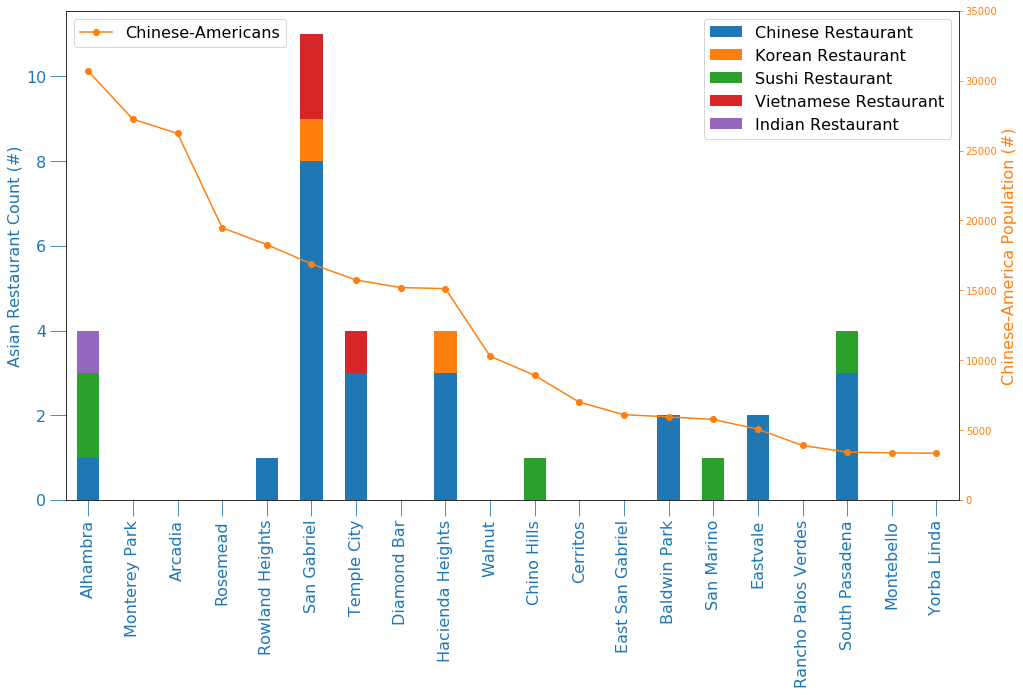

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = [16,9]
fig=plt.figure()

ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)



df_food.plot(x='City', kind='bar', stacked=True,ax=ax1)
ax1.set_xlabel("", color="C0", fontsize = 20)
ax1.tick_params(axis='x', colors="C0",size = 16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
ax1.set_ylabel("Asian Restaurant Count (#)", color="C0",size = 16)
ax1.tick_params(axis='y', colors="C0", size = 16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(16) 

ax1.legend(loc='upper right', fontsize=16)
    
    

df_popu.plot(x='City',y='Chinese-Americans',  kind='line', style='.-', marker='o', color="C1", ax=ax2)

ax2.yaxis.tick_right()
ax2.set_ylim([0,35000])
ax2.set_ylabel('Chinese-America Population (#)', color="C1", size = 16)       
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="C1")
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
ax2.set_xlim([-0.5,19.5])
for tick in ax2.xaxis.get_major_ticks():
    #tick.tick1line.set_markersize(0)
    #tick.tick2line.set_markersize(0)
    tick.label.set_fontsize(16) 
    tick.label1.set_horizontalalignment('center')
#ax2.xaxis.tick_top()
ax2.xaxis.set_visible(False)
#ax2.set_xlabel('x label 2', color="C1")
#ax2.xaxis.set_label_position('top')
#ax2.tick_params(axis='x', colors="C1")

ax2.legend(loc='upper left', fontsize=16)



#plt.xlabel('my x label', size = 16)
#plt.ylabel('my y label', size = 16)
#plt.title('my title', size = 40)
#plt.xticks(size = 12)
#plt.yticks(size = 12)
#plt.legend(loc='upper right')

plt.show()

## Thanks for your Review